# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Riyan Zaenal Arifin
- Email: riyanzaenal411@gmail.com
- Id Dicoding: riyan_zaenal_arifin

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import pkg_resources

/tmp/ipykernel_764/1578271236.py:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


### Menyiapkan data yang akan diguankan

## Data Understanding

Dataset yang digunakan adalah dataset Predict Students' Dropout and Academic Success yang mencakup 4.424 baris dengan 36 fitur, termasuk demografi (usia, jenis kelamin, status perkawinan), faktor akademik (nilai masuk, program studi, nilai semester), dan faktor sosial-ekonomi (status pekerjaan orang tua, beasiswa). Target variabelnya adalah status akademik siswa: lulus, putus sekolah, atau masih terdaftar. Berikut penjelasan fitur-fitur tersebut 
| **Nama Fitur**                          | **Deskripsi**                                                                 | **Tipe Data**       |
|-----------------------------------------|-------------------------------------------------------------------------------|---------------------|
| Marital status                          | Status perkawinan siswa (1: lajang, 2: menikah, dll.)                         | Kategorikal         |
| Application mode                        | Cara pendaftaran siswa (1: fase 1, 2: fase 2, dll.)                           | Kategorikal         |
| Application order                       | Urutan preferensi pendaftaran (1: pilihan pertama, dll.)                      | Ordinal             |
| Course                                  | Program studi/kursus yang diambil (misalnya, 1: Teknik, 2: Kedokteran, dll.)   | Kategorikal         |
| Daytime/evening attendance              | Jenis kehadiran (1: siang, 0: malam)                                          | Biner               |
| Previous qualification                  | Kualifikasi pendidikan sebelumnya (1: SMA, 2: Diploma, dll.)                  | Kategorikal         |
| Previous qualification (grade)          | Nilai kualifikasi sebelumnya (skala 0-200)                                    | Numerik             |
| Nationality                             | Kebangsaan siswa (1: Portugis, 2: Jerman, dll.)                               | Kategorikal         |
| Mother's qualification                  | Kualifikasi pendidikan ibu (1: SMA, 2: Sarjana, dll.)                         | Kategorikal         |
| Father's qualification                  | Kualifikasi pendidikan ayah (1: SMA, 2: Sarjana, dll.)                        | Kategorikal         |
| Mother's occupation                     | Pekerjaan ibu (0: tidak bekerja, 1: pekerja manual, dll.)                     | Kategorikal         |
| Father's occupation                     | Pekerjaan ayah (0: tidak bekerja, 1: pekerja manual, dll.)                    | Kategorikal         |
| Admission grade                         | Nilai masuk siswa (skala 0-200)                                               | Numerik             |
| Displaced                               | Status perpindahan siswa (1: pindah, 0: tidak pindah)                         | Kategorikal         |
| Educational special needs               | Kebutuhan pendidikan khusus (1: ya, 0: tidak)                                 | Kategorikal         |
| Debtor                                  | Status utang siswa (1: ya, 0: tidak)                                          | Kategorikal         |
| Tuition fees up to date                 | Status pembayaran biaya kuliah (1: lunas, 0: belum lunas)                     | Kategorikal         |
| Gender                                  | Jenis kelamin siswa (1: laki-laki, 0: perempuan)                              | Kategorikal         |
| Scholarship holder                      | Status beasiswa (1: menerima beasiswa, 0: tidak)                              | Kategorikal         |
| Age at enrollment                       | Usia siswa saat mendaftar (dalam tahun)                                       | Numerik             |
| International                           | Status internasional siswa (1: internasional, 0: domestik)                    | Kategorikal         |
| Curricular units 1st sem (credited)     | Jumlah SKS yang dikreditkan pada semester 1                                   | Numerik             |
| Curricular units 1st sem (enrolled)     | Jumlah SKS yang diambil pada semester 1                                       | Numerik             |
| Curricular units 1st sem (evaluations)  | Jumlah evaluasi (ujian/tugas) pada semester 1                                 | Numerik             |
| Curricular units 1st sem (approved)     | Jumlah SKS yang lulus pada semester 1                                         | Numerik             |
| Curricular units 1st sem (grade)        | Rata-rata nilai pada semester 1 (skala 0-20)                                  | Numerik             |
| Curricular units 1st sem (without eval) | Jumlah SKS tanpa evaluasi pada semester 1                                     | Numerik             |
| Curricular units 2nd sem (credited)     | Jumlah SKS yang dikreditkan pada semester 2                                   | Numerik             |
| Curricular units 2nd sem (enrolled)     | Jumlah SKS yang diambil pada semester 2                                       | Numerik             |
| Curricular units 2nd sem (evaluations)  | Jumlah evaluasi (ujian/tugas) pada semester 2                                 | Numerik             |
| Curricular units 2nd sem (approved)     | Jumlah SKS yang lulus pada semester 2                                         | Numerik             |
| Curricular units 2nd sem (grade)        | Rata-rata nilai pada semester 2 (skala 0-20)                                  | Numerik             |
| Curricular units 2nd sem (without eval) | Jumlah SKS tanpa evaluasi pada semester 2                                     | Numerik             |
| Unemployment rate                       | Tingkat pengangguran di wilayah siswa (persentase)                            | Numerik             |
| Inflation rate                          | Tingkat inflasi di wilayah siswa (persentase)                                 | Numerik             |
| GDP                                     | Produk Domestik Bruto wilayah SISWA (indikator ekonomi)                       | Numerik             |
| Status                                  | Status akademik siswa (Graduate, Dropout, Enrolled)                           | Kategorikal         |

In [2]:
df = pd.read_csv('./Dataset/data.csv', delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Gambaran Dataset

Kode berikut digunakan untuk melihat gambaran dataset yang akan digunakan.

In [3]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Feature Unik = 1

Tahap ini akan dilakukan pengecekan fitur yang memiliki nilai unik = 1.

In [11]:
constant_columns = df.columns[df.nunique() == 1]
print("Kolom dengan nilai unik hanya 1:", constant_columns.tolist())

Kolom dengan nilai unik hanya 1: []


### Cek Miising Data

Kode berikut digunakan untuk melihat data yang kosong.

In [6]:
def missing_values(df):
    # Masukan nilai yang memungkinkan missing
    missing_values = ['', ' ', 'NaN', 'Nan', 'nan','NULL','Null','null','N/A','n/a', '.', ',','-','--','---', 'TIDAK ADA DATA', 'KOSONG']
    col_names = list(df.columns)
    df[col_names] = df[col_names].replace(missing_values, np.nan)

    # Hitung jumlah data yang kosong
    missing_values = df.isnull().sum()
    missing_values = pd.DataFrame(missing_values, columns=['count'])
    missing_values.reset_index(inplace=True)
    return missing_values

missing_values(df)

,index,count
0,Marital_status,0
1,Application_mode,0
2,Application_order,0
3,Course,0
4,Daytime_evening_attendance,0
5,Previous_qualification,0
6,Previous_qualification_grade,0
7,Nacionality,0
8,Mothers_qualification,0
9,Fathers_qualification,0


### Cek Data Duplikat

Tahap ini akan dilakukan pengecekan data yang duplikat.

In [7]:
print("Jumlah duplikat: ", df.duplicated().sum())

Jumlah duplikat:  0


### Cek Distribusi 

Kode berikut untuk cek distribusi, baik distribusi fitur numerik atau fitur kategori

In [7]:
cat_features = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International', 
    'Status'
]

#### Distribusi Fitur Numerik

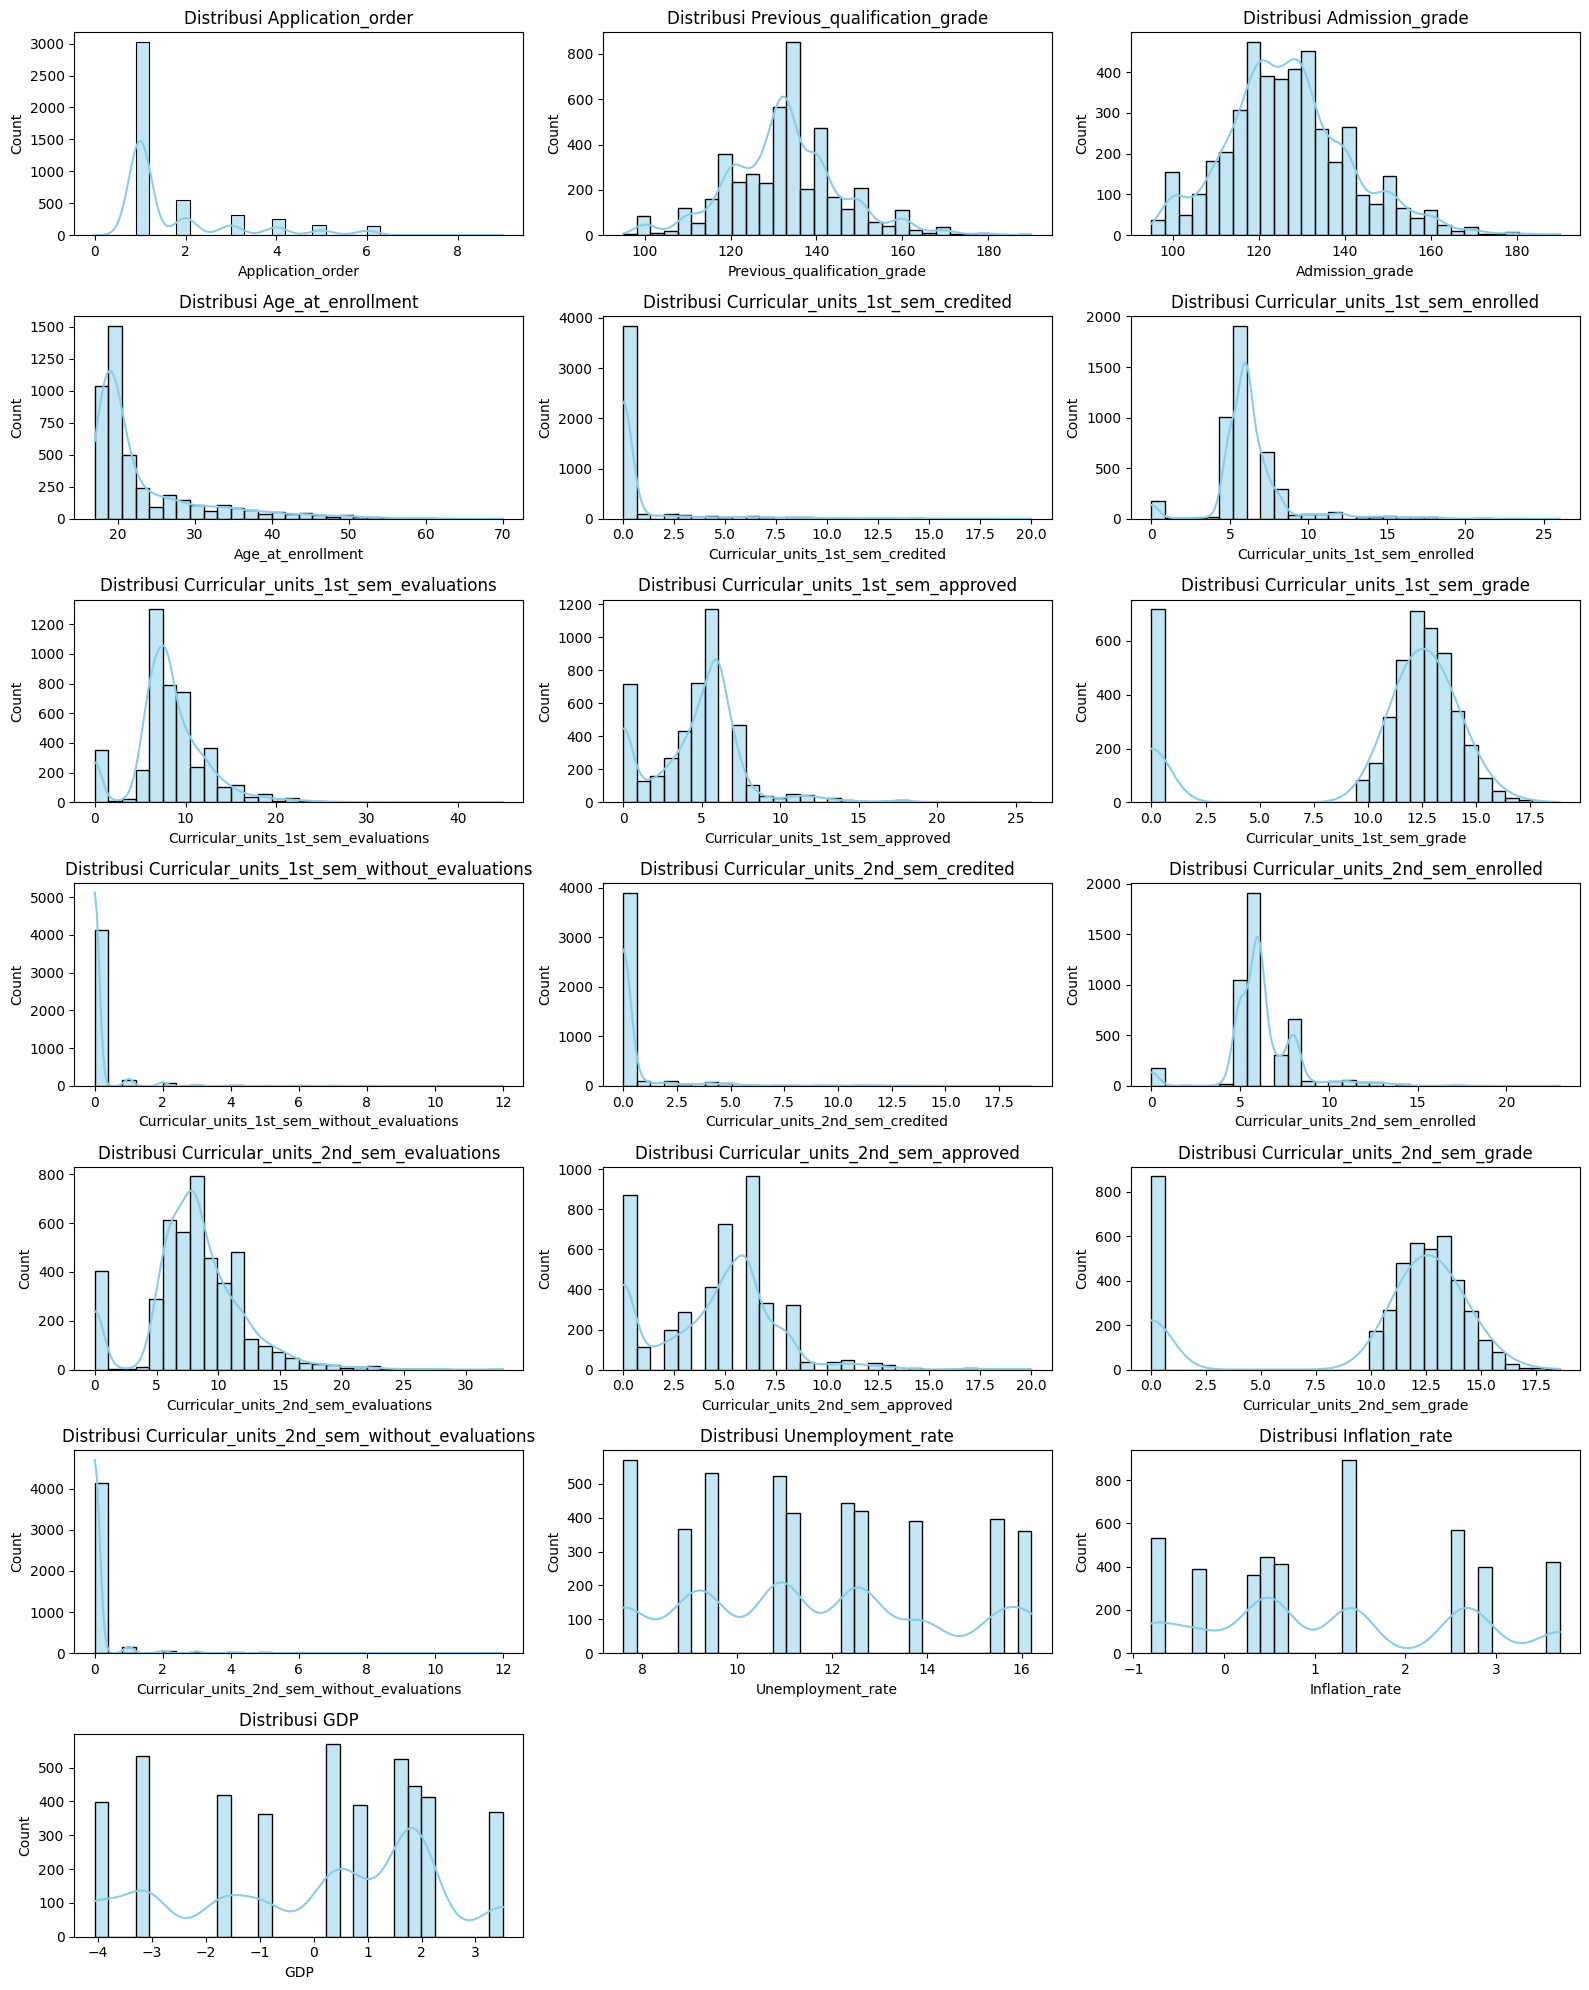

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in cat_features]

# Plot distribusi kolom numerik
plt.figure(figsize=(16, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.show()

Dari distribusi fitur numerik di atas dapat diketahui bahwa :
- Fitur Previous_qualification_grade dan Admission_grade tampak mendekati distribusi normal
- Fitur Age_at_enrollment, Curricular_units_1st_sem_credited, Curricular_units_2nd_sem_credited, dan Curricular_units_2nd_sem_without_evaluations tampak berdistribusi right-skewed

#### Distribusi Fitur Kategorikal

/tmp/ipykernel_764/1091004573.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipykernel_764/1091004573.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipykernel_764/1091004573.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipykernel_764/1091004573.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fa

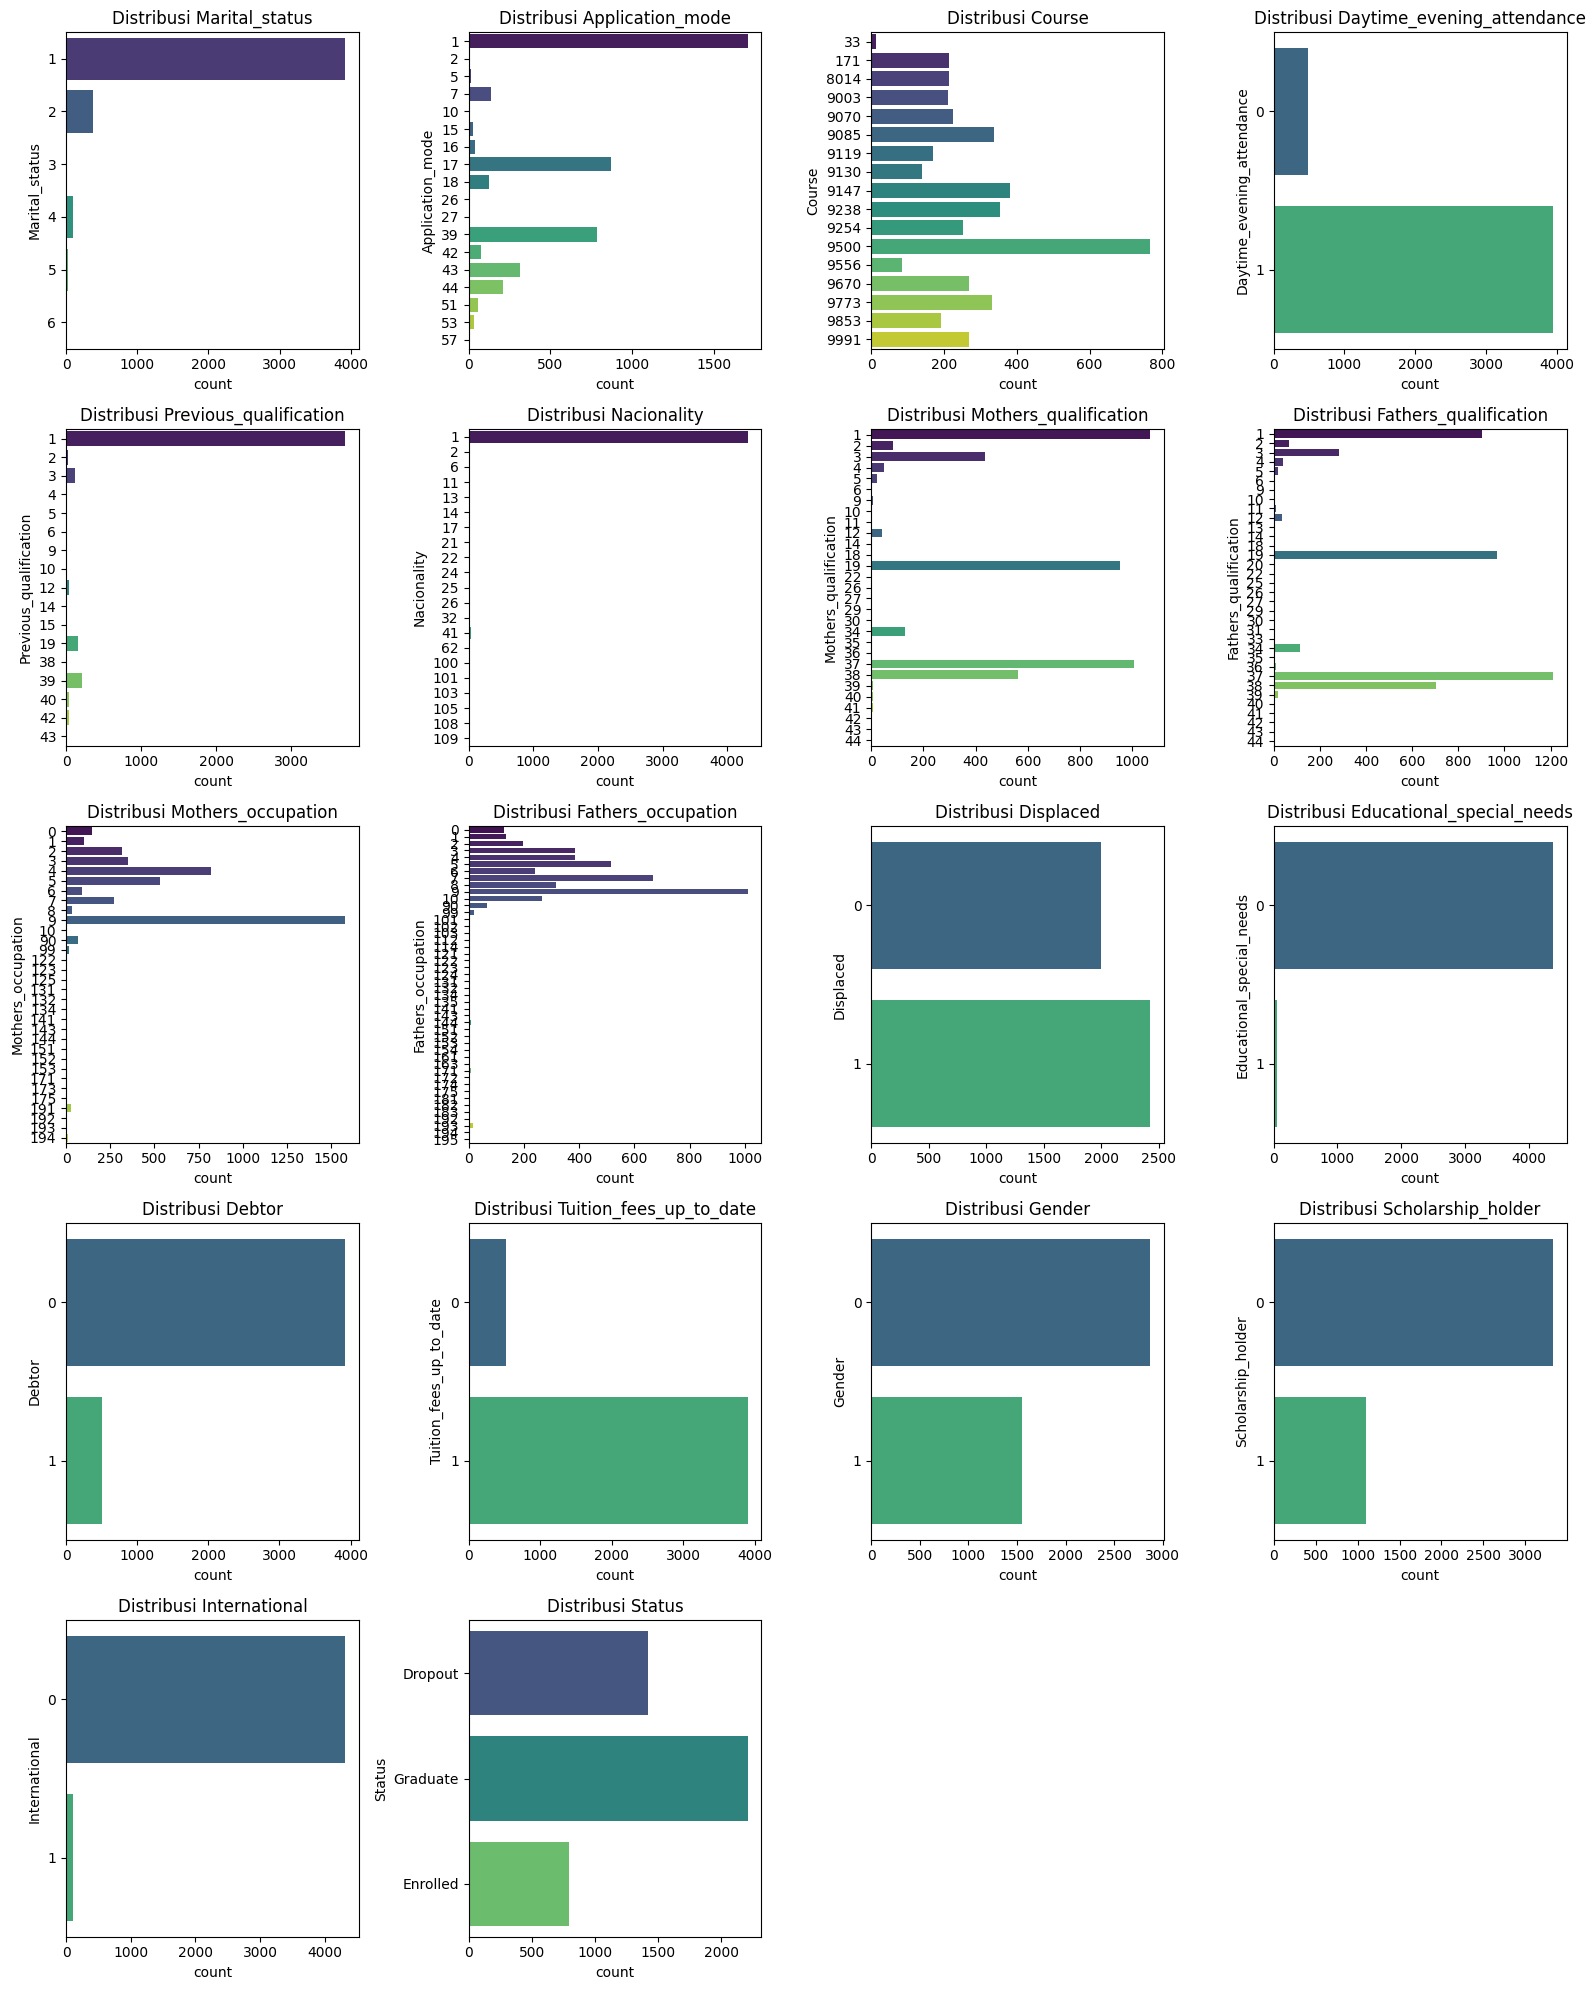

In [6]:
n_cols = 4
n_rows = int(np.ceil(len(cat_features) / n_cols))

plt.figure(figsize=(16, n_rows * 4))
for i, column in enumerate(cat_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()


Dari distribusi di atas dapat diketahui bahwa:
- Fitur Course dan Status tampak mendekati distribusi normal 
- Fitur Marital_status, Nacionality, Debtor, Gender, Scholarship_holder, dan International tampak berdistribusi right-skewed
- Fitur Tuition_fees_up_to_date dan Daytime_evening_attendance tampak berdistribusi left-skewed

### Matrik Korelasi

Kode berikut digunakan untuk menampilkan korelasi antar fitur numerik

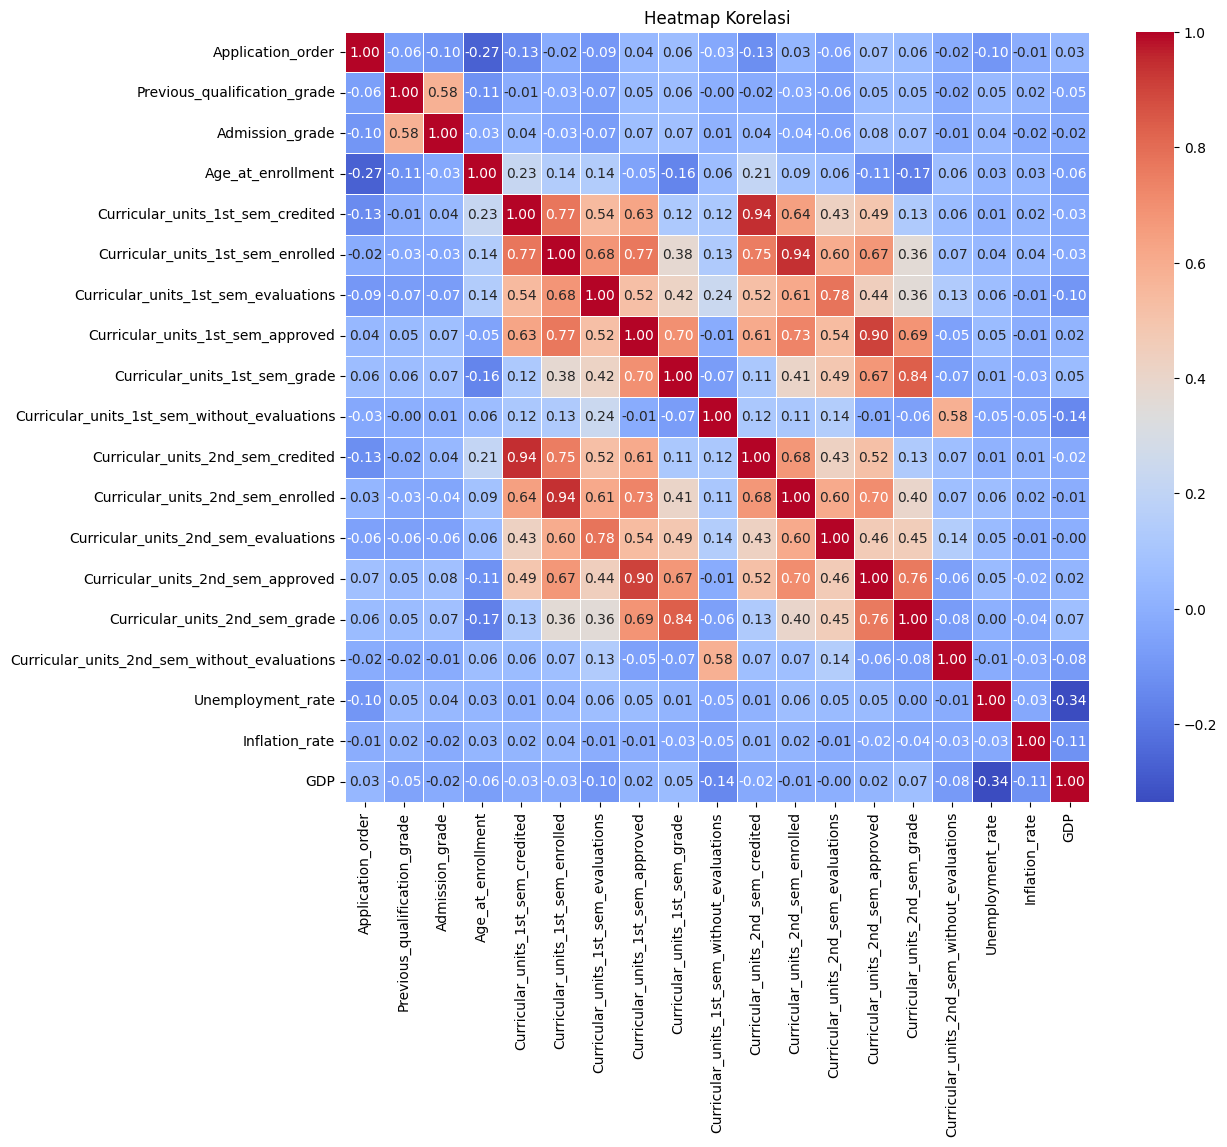

In [10]:
numeric_df = df[num_cols]
correlation_matrix = numeric_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()


Dari matrik korelasi di atas, dapat diketahui bahwa korelasi yang paling kuat adalah fitur:
- Curricular_units_2nd_sem_credited dengan Curricular_units_1st_sem_credited
- Curricular_units_1st_sem_enrolled dengan Curricular_units_2nd_sem_enrolled
- Curricular_units_1st_sem_approved dengan Curricular_units_2nd_sem_approved

### Cek Distribusi Label

Tahap ini akan dilakukan pengecekan distribusi label.

/tmp/ipykernel_6800/1175152614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='viridis')


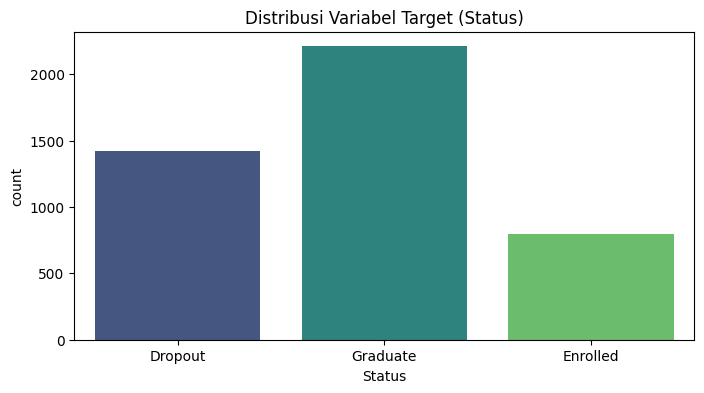

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Status', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Status)')
plt.show()

## Data Preparation / Preprocessing

### Label Encoder

Pada tahap ini akan mengubah feature 'Status' yang sebelumnya berbentuk kategori menjadi numerik.

In [9]:
le = LabelEncoder()
df['status_encoded'] = le.fit_transform(df['Status'])
df.drop('Status', axis=1, inplace=True)
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,status_encoded
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


### SMOTE

Pada tahap ini akan dilakukan teknik SMOTE agar diperoleh data label yang seimbang.

In [10]:
# Contoh data (misalnya X adalah fitur, y adalah label)
y = df['status_encoded']

# Terapkan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df, y)
X_resampled = X_resampled.drop_duplicates()
X_resampled

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,status_encoded
0,1,17,5,171,1,1,122.000000,1,19,12,...,0,0,0,0,0.000000,0,10.800000,1.400000,1.740000,0
1,1,15,1,9254,1,1,160.000000,1,1,3,...,0,6,6,6,13.666667,0,13.900000,-0.300000,0.790000,2
2,1,1,5,9070,1,1,122.000000,1,37,37,...,0,6,0,0,0.000000,0,10.800000,1.400000,1.740000,0
3,1,17,2,9773,1,1,122.000000,1,38,37,...,0,6,10,5,12.400000,0,9.400000,-0.800000,-3.120000,2
4,2,39,1,8014,0,1,100.000000,1,37,38,...,0,6,6,6,13.000000,0,13.900000,-0.300000,0.790000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,1,1,1,9853,1,1,127.572544,1,4,1,...,0,6,9,4,12.705014,0,10.800000,1.400000,1.740000,1
6623,1,17,4,9500,1,1,136.446258,1,1,1,...,0,8,8,7,12.775719,0,13.556680,-0.111728,0.895211,1
6624,1,1,1,9147,1,1,129.240418,1,37,37,...,0,5,9,3,13.250375,0,10.030664,1.688501,1.398607,1
6625,2,39,1,9991,0,39,140.000000,1,37,19,...,0,5,7,5,11.808354,0,12.660616,3.646295,-1.716947,1


/tmp/ipykernel_6800/2875682931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status_encoded', data=X_resampled, palette='viridis')


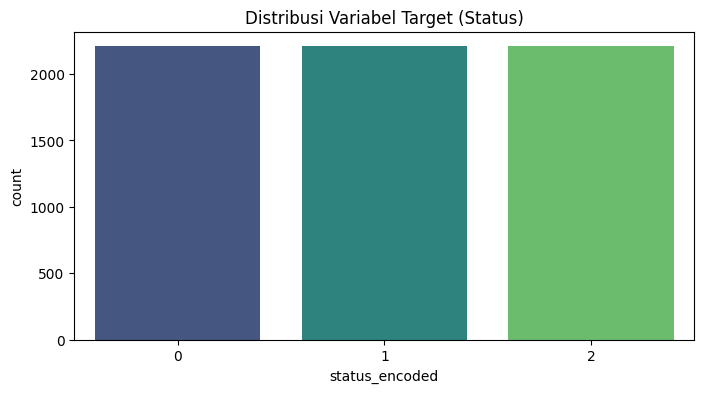

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='status_encoded', data=X_resampled, palette='viridis')
plt.title('Distribusi Variabel Target (Status)')
plt.show()

### Normalisasi

Pada tahap ini setiap data yang sudah melalui label encoding akan dilakukan normalisasi agar diperoleh skala yang sama.

In [12]:
# Contoh data (misalnya X adalah fitur, y adalah label)
X = X_resampled.drop(columns=['status_encoded'])
y = X_resampled['status_encoded']

# proses standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = pd.concat([X_scaled.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# simpan hasil normalisasi
joblib.dump(scaler, './Model/scaler.pkl')
    
X_scaled

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,status_encoded
0,-0.281486,-0.119015,2.802865,-4.192640,0.353463,-0.350575,-0.812439,-0.127688,-0.014378,-0.657450,...,-0.258989,-2.946125,-2.103460,-1.390720,-1.950203,-0.201732,-0.260968,0.117713,0.807488,0
1,-0.281486,-0.234274,-0.523827,0.194643,0.353463,-0.350575,2.265327,-0.127688,-1.178739,-1.247553,...,-0.258989,-0.013497,-0.540225,0.724324,0.726357,-0.201732,0.950993,-1.178613,0.365894,2
2,-0.281486,-1.041084,2.802865,0.105767,0.353463,-0.350575,-0.812439,-0.127688,1.149983,0.981723,...,-0.258989,-0.013497,-2.103460,-1.390720,-1.950203,-0.201732,-0.260968,0.117713,0.807488,0
3,-0.281486,-0.119015,0.307846,0.445331,0.353463,-0.350575,-0.812439,-0.127688,1.214670,0.981723,...,-0.258989,-0.013497,0.501932,0.371816,0.478286,-0.201732,-0.808305,-1.559885,-1.451614,2
4,1.519099,1.148829,-0.523827,-0.404304,-2.829148,-0.350575,-2.594303,-0.127688,1.149983,1.047290,...,-0.258989,-0.013497,-0.540225,0.724324,0.595793,-0.201732,0.950993,-1.178613,0.365894,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,-0.281486,-1.041084,-0.523827,0.483972,0.353463,-0.350575,-0.361097,-0.127688,-0.984679,-1.378687,...,-0.258989,-0.013497,0.241393,0.019309,0.538021,-0.201732,-0.260968,0.117713,0.807488,1
6623,-0.281486,-0.119015,1.971192,0.313466,0.353463,-0.350575,0.357619,-0.127688,-1.178739,-1.378687,...,-0.258989,0.964045,-0.019146,1.076831,0.551869,-0.201732,0.816771,-1.035047,0.414800,1
6624,-0.281486,-1.041084,-0.523827,0.142959,0.353463,-0.350575,-0.226010,-0.127688,1.149983,0.981723,...,-0.258989,-0.502268,0.241393,-0.333198,0.644828,-0.201732,-0.561744,0.337708,0.648797,1
6625,1.519099,1.148829,-0.523827,0.550629,-2.829148,3.385994,0.645450,-0.127688,1.149983,-0.198482,...,-0.258989,-0.502268,-0.279685,0.371816,0.362414,-0.201732,0.466450,1.830613,-0.799425,1


### Spliting Data

Pada tahap ini akan dilakukan pembagian data sebesar 70% data training dan 30% data testing.

In [13]:
X = X_scaled.drop(columns=['status_encoded'])  # Fitur
y = X_scaled['status_encoded']  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Modeling

Pada tahap ini akan dilakukan proses model development menggunakan algoritma Gradient Boosting.

In [14]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Pada tahap ini akan dilakukan analisis fitur yang paling relevan dengan mengambil top 20 fitur. Hasil analisis akan digunakan untuk proses pembuatan dashboard.

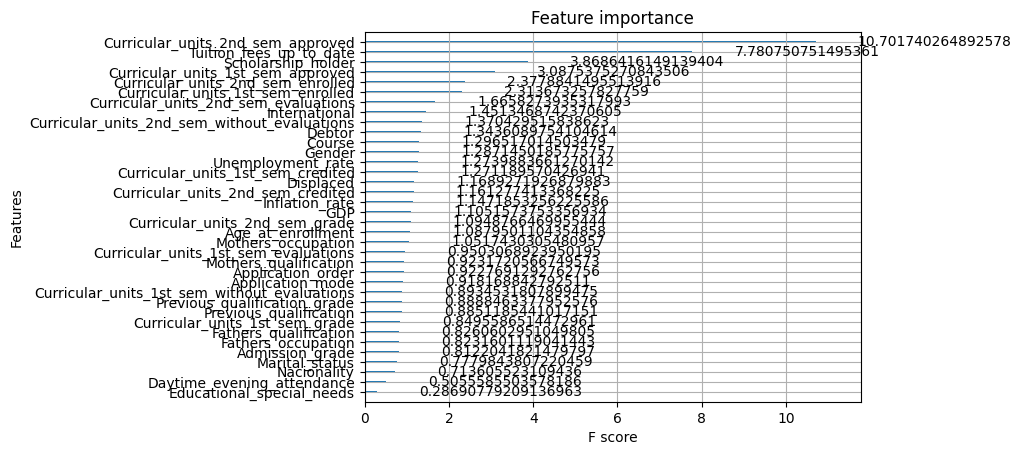

In [15]:
# Plot feature importance
plot_importance(model, importance_type='gain')  # atau 'weight', 'cover'
plt.show()

## Evaluation

Pada tahap ini akan dilakukan proses evaluasi dari modelyang telah didevelopment.

In [16]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, average='macro'),
        'Recall': recall_score(y, y_pred, average='macro'),
        'F1-Score': f1_score(y, y_pred, average='macro'),
        'Classification Report': classification_report(y, y_pred)
    }
    
    return results

### Evaluasi Data Testing

In [17]:
results = {
    'Gradient Boosting': evaluate_model(model, X_test, y_test),
}

In [18]:
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

               Model  Accuracy  Precision   Recall  F1-Score
0  Gradient Boosting   0.82906   0.832356  0.82906   0.82886


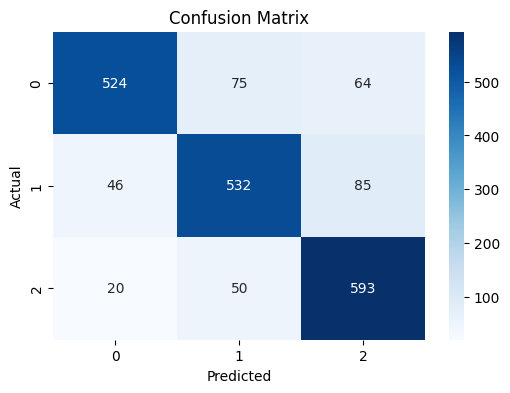

In [19]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan dengan heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Evaluasi Data Training

In [20]:
results = {
    'Gradient Boosting': evaluate_model(model, X_train, y_train),
}

In [21]:
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

               Model  Accuracy  Precision    Recall  F1-Score
0  Gradient Boosting  0.999784   0.999785  0.999784  0.999784


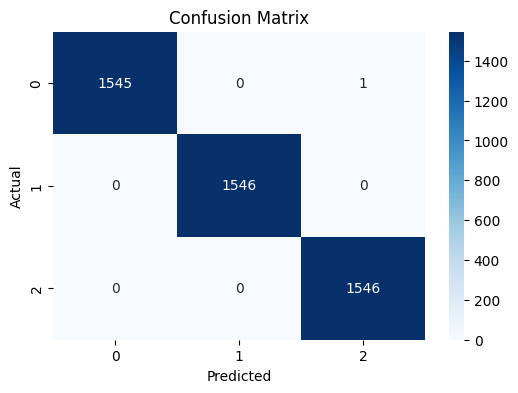

In [22]:
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

# Visualisasikan dengan heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Kesimpulan

Model machine learning yang dikembangkan menggunakan algoritma Gradient Boosting berhasil membedakan tiga status siswa, yaitu dropout, enrolled, dan graduate. Model menunjukkan performa yang sangat tinggi pada data training dengan akurasi sebesar 99%, namun mengalami penurunan performa pada data testing dengan akurasi 82%. Hal ini mengindikasikan adanya kemungkinan overfitting, di mana model terlalu menyesuaikan diri dengan data training dan kurang optimal saat diuji dengan data baru.

Meskipun demikian, akurasi testing sebesar 82% menunjukkan bahwa model cukup andal untuk digunakan sebagai alat bantu prediksi awal terhadap risiko siswa dropout. Pengembangan dan evaluasi lebih lanjut tetap diperlukan agar model dapat lebih stabil dan akurat pada berbagai kondisi data. Kedepannya bisa dilakukan berbagai hal untuk mengoptimalkan model, seperti menggunakan dataset asli dengan jumlah yang lebih banyak, pemrosesan data yang lebih optimal, penggunaaan algoritma lain, dan lain-lain.

#### Simpan Model

Tahap selanjutnya adalah penyimpanan model untuk proses deployement.

In [23]:
joblib.dump(model, './Model/model.pkl')

['./Model/model.pkl']

#### Simpan Library

Tahap terakhir adalah menyimpan semua library beserta versinya ke dalam file requirements.txt

In [24]:
installed_packages = {pkg.key for pkg in pkg_resources.working_set}

# Menyimpan nama library beserta versi yang digunakan ke file requirements.txt
with open('./requirements.txt', 'w') as f:
    for package in sorted(installed_packages):
        version = pkg_resources.get_distribution(package).version
        f.write(f"{package}=={version}\n")